## AAI 627: Data Acquisition, Modeling and Analysis

## Fall 2022: Project Assignment

### Driver Drowsiness Alert System using Deep Learning
### Part 1: Model training for Eye feature detection

In [1]:
import cv2 as cv
import os
import tensorflow as tf
import numpy as np
import face_recognition
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
import config as cf

def load_images(folder,eye_indicator=0):
    img_count=0
    error_count=0
    images_arr = []
    
    for file in os.listdir(folder):
        try:
            img = cv.imread(os.path.join(folder,file))
            img = cv.resize(img,(80,80))
            images_arr.append([img,eye_indicator])
        except Exception as e:
            error_count+=1
            print(e)
            continue
        img_count+=1
    
    print("Image Load Status from: {} ".format(folder))
    print("Successfully Loaded:{} Error Counts:{}".format(img_count,error_count))
    return images_arr


In [2]:
open_eyes=load_images(os.path.join(cf.TRAINING_PATH,"Open_Eyes"))
closed_eyes= load_images(os.path.join(cf.TRAINING_PATH,"Close_Eyes"),eye_indicator=1)
y_labels=["Open","Closed"]

Image Load Status from: D:\CodesandPractical\Subjects\AAI 627 Data Acquistion and modeling\Project\Code\data\Training\Open_Eyes 
Successfully Loaded:4390 Error Counts:0
Image Load Status from: D:\CodesandPractical\Subjects\AAI 627 Data Acquistion and modeling\Project\Code\data\Training\Close_Eyes 
Successfully Loaded:6036 Error Counts:0


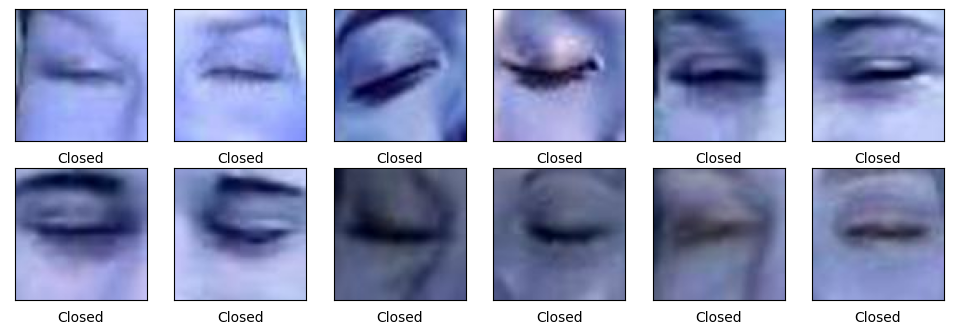

In [3]:
x, y =[],[]
for features,label in open_eyes:
    x.append(features)
    y.append(label)
for features,label in closed_eyes:
    x.append(features)
    y.append(label)

plt.figure(figsize=(12,12))

for i in range(12):
    plt.subplot(6,6,i+1)
    plt.imshow(closed_eyes[i][0], cmap=plt.get_cmap('gray'))
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(y_labels[closed_eyes[i][1]])

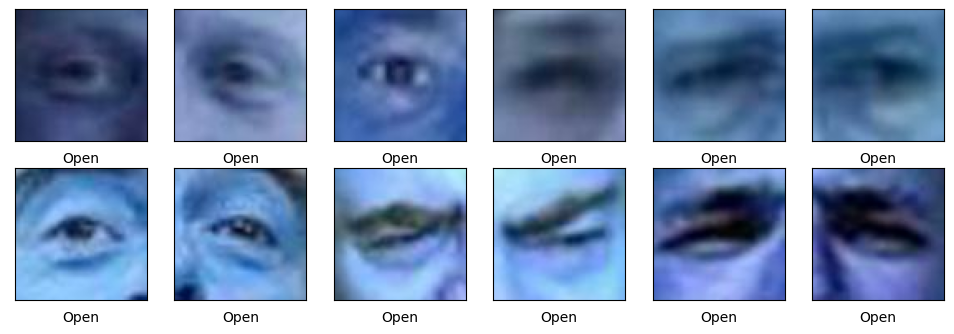

In [4]:
plt.figure(figsize=(12, 12))
for i in range(12):
    plt.subplot(6,6,i+1)
    plt.imshow(open_eyes[i][0], cmap=plt.get_cmap('gray'))
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(y_labels[open_eyes[i][1]])

In [5]:
x = np.array(x).reshape(-1, 80, 80, 3)
y = np.array(y)
x = x/255.0
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [6]:
activation="relu"
filter_size=(3,3)
model = Sequential()
model.add(Conv2D(
    filters=32,  # number of filters
    kernel_size=(3, 3),  # height/width of filter
    activation=activation,  # activation function
    input_shape=(80, 80, 3)  # shape of input (image)
))
model.add(Conv2D(
    filters=32,  # number of filters
    kernel_size=(3, 3),  # height/width of filter
    activation=activation  # activation function
))
model.add(Conv2D(
    filters=32,  # number of filters
    kernel_size=(3, 3),  # height/width of filter
    activation=activation  # activation function
))

# Adding pooling after convolutional layers
# Dimensions of the region that you are pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding second set of convolutional layers
model.add(Conv2D(
    filters=32,  # number of filters
    kernel_size=(3, 3),  # height/width of filter
    activation=activation  # activation function
))
model.add(Conv2D(
    filters=32,  # number of filters
    kernel_size=(3, 3),  # height/width of filter
    activation=activation  # activation function
))

# Add last pooling layer.
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

# Adding first dense layer with 256 nodes
model.add(Dense(256, activation=activation))

# Adding a dropout layer to avoid overfitting
model.add(Dropout(0.3))

model.add(Dense(128, activation=activation))
model.add(Dropout(0.3))

model.add(Dense(64, activation=activation))
model.add(Dropout(0.3))

# adding output layer
model.add(Dense(1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=[tf.keras.metrics.AUC(curve='PR')])

# fitting the model
model_history = model.fit(X_train,
          y_train,
          batch_size=800,
          validation_data=(X_test, y_test),
          epochs=24)


Epoch 1/24
10/10 [==============================] - 62s 6s/step - loss: 0.6700 - auc: 0.6630 - val_loss: 0.6167 - val_auc: 0.8368
Epoch 2/24
10/10 [==============================] - 61s 6s/step - loss: 0.5963 - auc: 0.8113 - val_loss: 0.5208 - val_auc: 0.9218
Epoch 3/24
10/10 [==============================] - 61s 6s/step - loss: 0.4772 - auc: 0.8880 - val_loss: 0.3420 - val_auc: 0.9540
Epoch 4/24
10/10 [==============================] - 59s 6s/step - loss: 0.3213 - auc: 0.9498 - val_loss: 0.2559 - val_auc: 0.9703
Epoch 5/24
10/10 [==============================] - 59s 6s/step - loss: 0.2260 - auc: 0.9721 - val_loss: 0.2035 - val_auc: 0.9813
Epoch 6/24
10/10 [==============================] - 59s 6s/step - loss: 0.1749 - auc: 0.9820 - val_loss: 0.1695 - val_auc: 0.9876
Epoch 7/24
10/10 [==============================] - 60s 6s/step - loss: 0.1525 - auc: 0.9864 - val_loss: 0.1371 - val_auc: 0.9910
Epoch 8/24
10/10 [==============================] - 60s 6s/step - loss: 0.1431 - auc: 0.98

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 76, 76, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 74, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 37, 37, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 35, 35, 32)        9248      
                                                                 
 conv2d_4 (Conv2D)           (None, 33, 33, 32)        9248      
                                                        

In [8]:
score = model.evaluate(X_test, y_test,verbose=1)

labels = model.metrics_names

# Show model performance.
print(f'{labels[0]}: {score[0]}')
print(f'{labels[1]}: {score[1]}')


98/98 [==============================] - 5s 49ms/step - loss: 0.0793 - auc: 0.9918
loss: 0.07932793349027634
auc: 0.9917988777160645


In [9]:
prediction = model.predict(X_test)


98/98 [==============================] - 5s 49ms/step


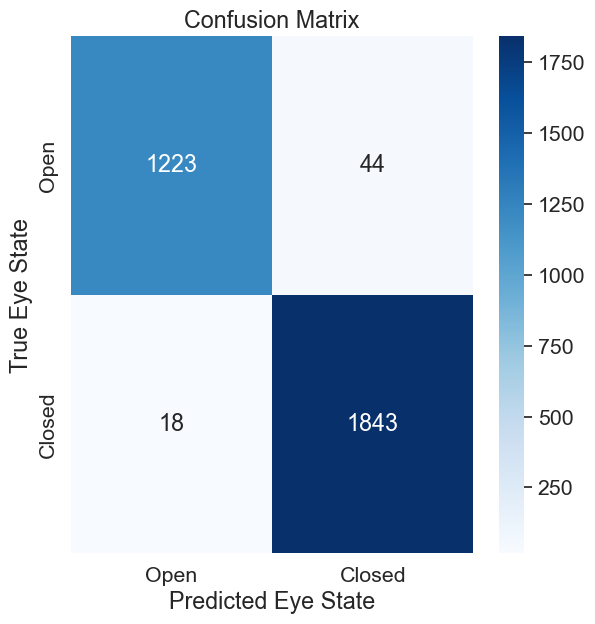

In [10]:
import seaborn as sns

figure = plt.figure(figsize=(6, 6))

sns.set(font_scale=1.4)

sns.heatmap(tf.math.confusion_matrix(labels=y_test,predictions=prediction.round()).numpy(),
             annot=True, 
             cmap=plt.cm.Blues, 
             fmt='g',
             xticklabels=y_labels,
             yticklabels=y_labels)

plt.tight_layout()
plt.title("Confusion Matrix")
plt.ylabel('True Eye State')
plt.xlabel('Predicted Eye State')
plt.savefig( os.path.join(cf.EXPORT_CHART_PATH,"heatmap_" +activation+"_"+str(filter_size)+".png"), transparent=True)


In [11]:



tn, fp, fn, tp = tf.math.confusion_matrix(labels=y_test,predictions=prediction.round()).numpy().ravel()


print("activation funtion: "+activation)
print("filter Size: "+str(filter_size))
# Calculate the specificity
specificty = tn / (tn + fp)
print(f'specificity: {specificty}')

# Sensitivity
sensitivity = tp / (tp + fn)
print(f'sensitivity / recall: {sensitivity}')

# Accuracy
accuracy = (tn + tp) / (tn + fp + fn + tp)
print(f'accuracy: {accuracy}')

# Precision
precision = tp / (tp + fp)
print(f'precision: {precision}')
print(model.summary())

activation funtion: relu
filter Size: (3, 3)
specificity: 0.9652722967640095
sensitivity / recall: 0.9903277807630306
accuracy: 0.9801790281329923
precision: 0.976682564917859
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 76, 76, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 74, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 37, 37, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 35, 35, 32)        9248      
            

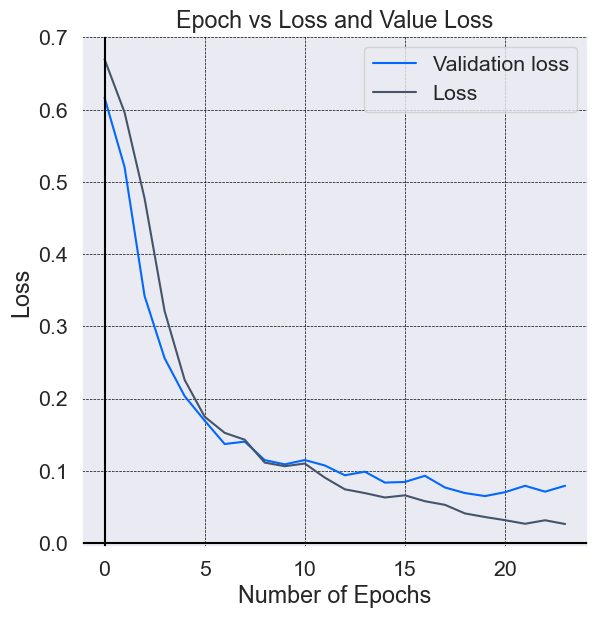

In [12]:
figure = plt.figure(figsize=(6, 6))
plt.plot(model_history.history['val_loss'],label="Validation loss",color="#0068FF")
plt.plot(model_history.history['loss'],label="Loss",color="#44546A")
plt.tight_layout()
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.axhline(0,color='black')
plt.axvline(0, color='black')
plt.title("Epoch vs Loss and Value Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()

plt.savefig(os.path.join(cf.EXPORT_CHART_PATH, "Line_Epoch_Val_loss_" +
            activation+"_"+str(filter_size)+".png"))


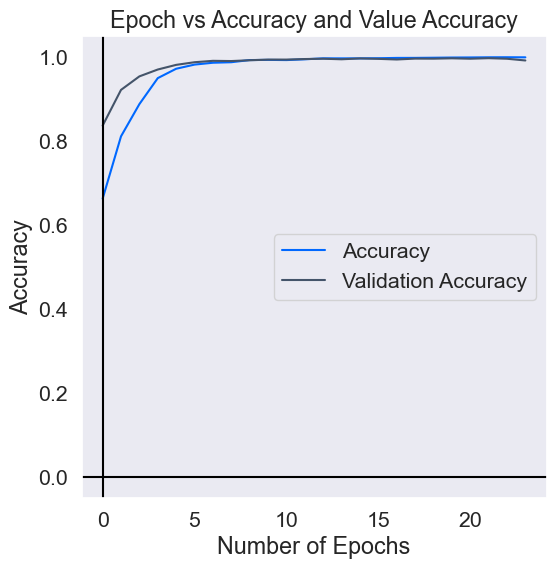

In [13]:
figure = plt.figure(figsize=(6, 6))
plt.plot(model_history.history['auc'],label="Accuracy",color="#0068FF")
plt.plot(model_history.history['val_auc'], label="Validation Accuracy",color="#44546A")
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.title("Epoch vs Accuracy and Value Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.grid()
plt.savefig(os.path.join(cf.EXPORT_CHART_PATH, "Line_Epoch_Val_Accuracy_" +
            activation+"_"+str(filter_size)+".png"))

In [14]:
model.save(os.path.join(cf.TRAINED_MODEL_PATH,"Model_"+activation+".h5"))